 # ResNet 101 layer 

In [12]:
import numpy as np
import tensorflow as tf
from keras.layers import *
from keras.losses import mae, sparse_categorical_crossentropy, binary_crossentropy
from keras.models import Model,load_model
from keras.optimizers import Nadam, Adam, RMSprop
from keras import backend as K

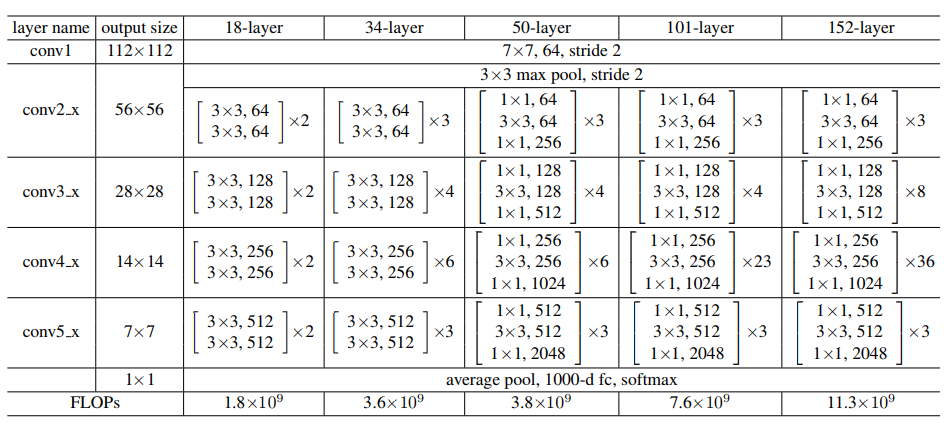




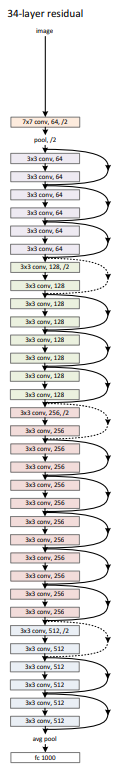




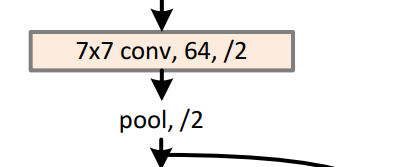

In [ ]:
def conv1Block(input_tensor):
    conv1_padding = ZeroPadding2D((3,3))(input_tensor)
    conv1_conv = Conv2D(64,7,strides=(2,2))(conv1_padding)
    conv1_bn = BatchNormalization()(conv1_conv)
    conv1_relu = LeakyReLU()(conv1_bn)    
        
    pool1_padding = ZeroPadding2D()(conv1_relu)
    pool1_pool = MaxPool2D((3,3),2)(pool1_padding)
    return pool1_pool


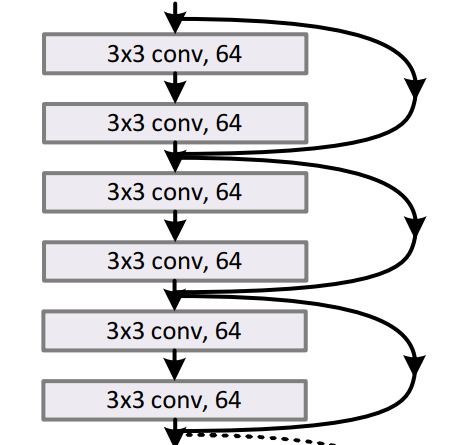

In [ ]:
def conv2Block(x,filters=[64,64,256],block_count=3):
    shortcut = x
    for i in range(block_count):
        if i ==0:
            x = Conv2D(filters[0],1)(x)
            x = BatchNormalization()(x)
            x = LeakyReLU()(x)

            x = Conv2D(filters[1],3,padding='same')(x)
            x = BatchNormalization()(x)
            x = LeakyReLU()(x)

            x = Conv2D(filters[2],1)(x)
            shortcut = Conv2D(filters[2],1)(x)
            x = BatchNormalization()(x)
            shortcut = BatchNormalization()(x)
            x = Add()([x,shortcut])
            x = LeakyReLU()(x)
        else:
            x = Conv2D(filters[0],1)(x)
            x = BatchNormalization()(x)
            x = LeakyReLU()(x)

            x = Conv2D(filters[1],3,padding='same')(x)
            x = BatchNormalization()(x)
            x = LeakyReLU()(x)

            x = Conv2D(filters[2],1)(x)            
            x = BatchNormalization()(x)                        
            x = Add()([x,shortcut])
            x = LeakyReLU()(x)        
            
        shortcut = x
    
    return x       

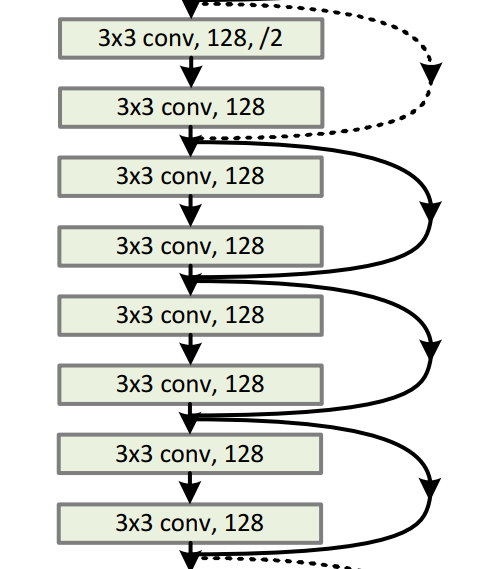

In [ ]:
def conv3Block(x,filters=[128,128,512],block_count=4):
    shortcut = x
    for i in range(block_count):
        if i ==0:
            x = Conv2D(filters[0],1,strides=(2,2))(x)
            x = BatchNormalization()(x)
            x = LeakyReLU()(x)

            x = Conv2D(filters[1],3,padding='same')(x)
            x = BatchNormalization()(x)
            x = LeakyReLU()(x)

            x = Conv2D(filters[2],1)(x)
            shortcut = Conv2D(filters[2],1,strides=(2,2))(x)
            x = BatchNormalization()(x)
            shortcut = BatchNormalization()(x)
            x = Add()([x,shortcut])
            x = LeakyReLU()(x)
        else:
            x = Conv2D(filters[0],1)(x)
            x = BatchNormalization()(x)
            x = LeakyReLU()(x)

            x = Conv2D(filters[1],3,padding='same')(x)
            x = BatchNormalization()(x)
            x = LeakyReLU()(x)

            x = Conv2D(filters[2],1)(x)            
            x = BatchNormalization()(x)                        
            x = Add()([x,shortcut])
            x = LeakyReLU()(x)        
            
        shortcut = x
    
    return x


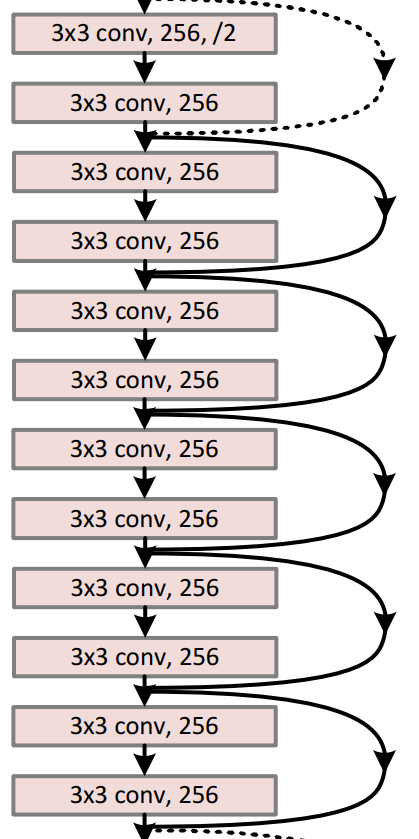

In [ ]:
def conv4Block(x,filters=[256,256,1024],block_count=23):
    shortcut = x
    for i in range(block_count):
        if i ==0:
            x = Conv2D(filters[0],1,strides=(2,2))(x)
            x = BatchNormalization()(x)
            x = LeakyReLU()(x)

            x = Conv2D(filters[1],3,padding='same')(x)
            x = BatchNormalization()(x)
            x = LeakyReLU()(x)

            x = Conv2D(filters[2],1)(x)
            shortcut = Conv2D(filters[2],1,strides=(2,2))(x)
            x = BatchNormalization()(x)
            shortcut = BatchNormalization()(x)
            x = Add()([x,shortcut])
            x = LeakyReLU()(x)
        else:
            x = Conv2D(filters[0],1)(x)
            x = BatchNormalization()(x)
            x = LeakyReLU()(x)

            x = Conv2D(filters[1],3,padding='same')(x)
            x = BatchNormalization()(x)
            x = LeakyReLU()(x)

            x = Conv2D(filters[2],1)(x)            
            x = BatchNormalization()(x)                        
            x = Add()([x,shortcut])
            x = LeakyReLU()(x)        
            
        shortcut = x
    
    return x

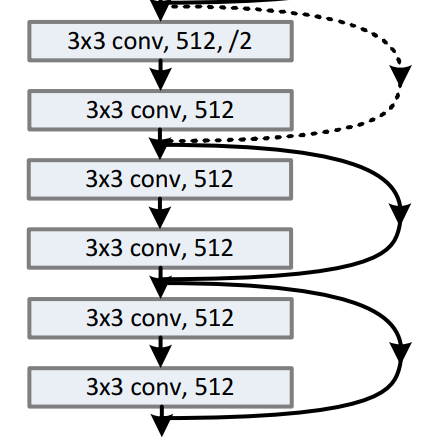

In [109]:
def conv5Block(x,filters=[512,512,2048],block_count=3):
    shortcut = x
    for i in range(3):
        if i ==0:
            x = Conv2D(filters[0],1,strides=(2,2))(x)
            x = BatchNormalization()(x)
            x = LeakyReLU()(x)

            x = Conv2D(filters[1],3,padding='same')(x)
            x = BatchNormalization()(x)
            x = LeakyReLU()(x)

            x = Conv2D(filters[2],1)(x)
            shortcut = Conv2D(filters[2],1,strides=(2,2))(x)
            x = BatchNormalization()(x)
            shortcut = BatchNormalization()(x)
            x = Add()([x,shortcut])            
            x = LeakyReLU()(x)
        else:
            x = Conv2D(filters[0],1)(x)
            x = BatchNormalization()(x)
            x = LeakyReLU()(x)

            x = Conv2D(filters[1],3,padding='same')(x)
            x = BatchNormalization()(x)
            x = LeakyReLU()(x)

            x = Conv2D(filters[2],1)(x)            
            x = BatchNormalization()(x)                        
            x = Add()([x,shortcut])
            x = LeakyReLU()(x)        
            
        shortcut = x
    
    return x

In [123]:
K.clear_session()
inputs =  Input(shape=(224,224,3))
num_classes = 10
conv1 = conv1Block(inputs)
conv2 = conv2Block(conv1)
conv3 = conv3Block(conv2)
conv4 = conv4Block(conv3) # block_count=6 is ResNet-50, defult block_count=23 (ResNet-101)
conv5 = conv5Block(conv4)

gpool = GlobalAveragePooling2D()(conv5)
dense = Dense(num_classes)(gpool)
dense = LeakyReLU()(dense)
dense = Softmax()(dense)
model =  Model(inputs, dense)
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
zero_padding2d_1 (ZeroPadding2D (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 112, 112, 64) 9472        zero_padding2d_1[0][0]           
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, 112, 112, 64) 256         conv2d_1[0][0]                   
____________________________________________________________________________________________

In [120]:
model.compile(loss='categorical_crossentropy', optimizer='nadam', metrics=['accuracy'])
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255


In [121]:
model.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=epochs,
              validation_data=(x_test, y_test),
              shuffle=True)

Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 220s 4ms/step - loss: 2.5644 - acc: 0.1577 - val_loss: 2.0954 - val_acc: 0.2372
Epoch 2/100
50000/50000 [==============================] - 196s 4ms/step - loss: 1.9758 - acc: 0.2619 - val_loss: 1.9903 - val_acc: 0.2601
Epoch 3/100
50000/50000 [==============================] - 195s 4ms/step - loss: 1.8387 - acc: 0.3124 - val_loss: 3.1070 - val_acc: 0.1210
Epoch 4/100
50000/50000 [==============================] - 196s 4ms/step - loss: 1.7601 - acc: 0.3390 - val_loss: 2.4641 - val_acc: 0.2287
Epoch 5/100
50000/50000 [==============================] - 201s 4ms/step - loss: 1.7178 - acc: 0.3542 - val_loss: 1.8178 - val_acc: 0.3382
Epoch 6/100
50000/50000 [==============================] - 201s 4ms/step - loss: 1.5611 - acc: 0.4224 - val_loss: 1.8071 - val_acc: 0.3349
Epoch 7/100
50000/50000 [==============================] - 197s 4ms/step - loss: 1.4530 - acc: 0.4705 - val_loss: 10

KeyboardInterrupt: 